In [1]:
import dill as pickle
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.metrics import roc_auc_score,confusion_matrix, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [2]:
df=pd.read_csv('data/final_dataset.csv', index_col=0)

In [3]:
df.shape

(1318050, 110)

In [4]:
df.head()

,visit_number,target,visit_day_night,dayofweek,utm_source_freq,utm_campaign_freq,utm_source_BHcvLfOaCWvWTykYqHVe,utm_source_MvfHsxITijuriZxsqZqt,utm_source_PlbkrSYoHuZBWfYjYnfw,utm_source_QxAxdyPLuQMEcrdZWdWb,...,utm_campaign_bxOTvPtyGSdUrbwoXCPO,utm_campaign_gecBYcKZCPMcVYdSSzKP,utm_campaign_nSReTmyFtbSjlPrTKoaX,utm_campaign_okTXSMadDkjvntEHzIjp,utm_campaign_other,utm_campaign_sbJRYgVfvcnqKJNDDYIr,utm_campaign_vRLTQQKAsFQMxbcHGPhu,utm_campaign_zxoiLxhuSIFrCeTLQVWZ,utm_campaign_infrequent_sklearn,device_screen_sqr_mm
0,1,0,1,2,552555,321286,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.318855
1,1,0,0,6,175831,234950,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.499740
2,1,0,0,1,552555,321286,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.318855
3,1,0,0,5,245178,195287,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.448035
4,2,0,0,5,245178,195287,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.448035


In [5]:
x=df.drop(['target'], axis=1)
y=df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [6]:
logreg = LogisticRegression(max_iter=500, class_weight='balanced')
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict_proba(x_test)
print('ROC_AUC: ', roc_auc_score(y_test, logreg_pred[:,1]))

ROC_AUC:  0.5689161233608504


In [7]:
gbm = GradientBoostingClassifier(random_state = 42)
gbm.fit(x_train, y_train)
gbm_pred = gbm.predict_proba(x_test)
print('ROC_AUC: ', roc_auc_score(y_test, gbm_pred[:,1]))


ROC_AUC:  0.6751365157313304


In [8]:
mlp = MLPClassifier(random_state=42, max_iter=300, hidden_layer_sizes=(500,200, 50), activation = 'logistic')
mlp.fit(x_train, y_train)
mlp_pred = mlp.predict_proba(x_test)
print('ROC_AUC: ', roc_auc_score(y_test, mlp_pred[:,1]))


ROC_AUC:  0.5618131110776676


In [9]:
#Самое лучшее качество дает GradientBoostingClassifier
# Подберем параметры для GradientBoostingClassifier
param_grid = {
   'n_estimators': [100, 500, 1000],
   'max_features': ['sqrt', 'log2']
}

# Модель для перебора параметров базовой модели
grid_search_gbm = GridSearchCV(
   estimator=gbm,
   param_grid=param_grid,
   scoring='roc_auc',
   verbose=100,
   n_jobs=1
)

# Выполняем перебор параметров
grid_search_gbm.fit(x_train, y_train)

# Выводим лучшие параметры
best_params = grid_search_gbm.best_params_
best_params

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START max_features=sqrt, n_estimators=100.........................
[CV 1/5; 1/6] END max_features=sqrt, n_estimators=100;, score=0.673 total time=  33.9s
[CV 2/5; 1/6] START max_features=sqrt, n_estimators=100.........................
[CV 2/5; 1/6] END max_features=sqrt, n_estimators=100;, score=0.671 total time=  33.9s
[CV 3/5; 1/6] START max_features=sqrt, n_estimators=100.........................
[CV 3/5; 1/6] END max_features=sqrt, n_estimators=100;, score=0.681 total time=  34.6s
[CV 4/5; 1/6] START max_features=sqrt, n_estimators=100.........................
[CV 4/5; 1/6] END max_features=sqrt, n_estimators=100;, score=0.673 total time=  33.7s
[CV 5/5; 1/6] START max_features=sqrt, n_estimators=100.........................
[CV 5/5; 1/6] END max_features=sqrt, n_estimators=100;, score=0.674 total time=  34.2s
[CV 1/5; 2/6] START max_features=sqrt, n_estimators=500.........................
[CV 1/5; 2/6] END m

{'max_features': 'sqrt', 'n_estimators': 1000}

In [10]:
#Обучим GradientBoostingClassifier с выбранными параметрами 
gbm = GradientBoostingClassifier(random_state = 42, max_features='sqrt', n_estimators=1000)
gbm.fit(x_train, y_train)
gbm_pred = gbm.predict_proba(x_test)
print('ROC_AUC: ', roc_auc_score(y_test, gbm_pred[:,1]))

ROC_AUC:  0.6855548709779395


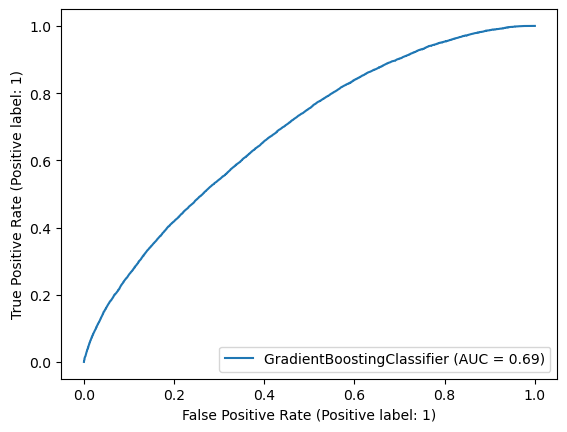

In [11]:
curve_disp = RocCurveDisplay.from_estimator(gbm, x_test, y_test)

In [12]:
feature_imp =[]
for feat, importance in zip(x.columns, gbm.feature_importances_):
    feature_imp.append((importance,feat))
    #    print ('{f} : {i}'.format(f=feat, i=importance))
feature_imp.sort(reverse = True)
feature_imp

[(0.13140390774386979, 'visit_number'),
 (0.09667010350666587, 'utm_campaign_freq'),
 (0.0721957454678897, 'utm_source_bByPQxmDaMXgpHeypKSM'),
 (0.06007238755448463, 'utm_source_freq'),
 (0.053280030647826, 'utm_adcontent_JNHcPlZPxEMWDnRiyoBf'),
 (0.04931809204637531, 'utm_campaign_LTuZkdKfxRGVceoWkVyg'),
 (0.046196682602527815, 'utm_medium_referral'),
 (0.036077575707360164, 'utm_campaign_FTjNLDyTrXaWYgZymFkV'),
 (0.032492211423071495, 'utm_medium_cpm'),
 (0.020970717067513713, 'device_screen_sqr_mm'),
 (0.019153554338882526, 'utm_campaign_other'),
 (0.018670525915965026, 'utm_source_fDLlAcSmythWSCVMvqvL'),
 (0.0154221242682447, 'geo_city_Moscow'),
 (0.01396413765803688, 'dayofweek'),
 (0.012303590135221757, 'device_brand_Samsung'),
 (0.012068415803664027, 'utm_campaign_infrequent_sklearn'),
 (0.01153534058060606, 'utm_medium_cpc'),
 (0.01106573016783833, 'visit_day_night'),
 (0.011036404468130192, 'utm_source_QxAxdyPLuQMEcrdZWdWb'),
 (0.010967219361843524, 'device_browser_short_Andro

Комментарий: на список значимости фичей я опиралась при создании новых фич,  в частности, utm_campaign_freq и utm_source_freq

In [13]:
#Сбалансируем датасет - это дает прибавку качества
df_1=df[df['target'] == 1]
df_0=df[df['target'] == 0]
df_0=df_0.iloc[:50314] 
df_balanced = pd.concat([df_1, df_0], axis=0)
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

In [14]:
df_balanced.to_csv('data/df_balanced.csv')

In [15]:
df=pd.read_csv('data/df_balanced.csv', index_col=0)
df.head()

,visit_number,target,visit_day_night,dayofweek,utm_source_freq,utm_campaign_freq,utm_source_BHcvLfOaCWvWTykYqHVe,utm_source_MvfHsxITijuriZxsqZqt,utm_source_PlbkrSYoHuZBWfYjYnfw,utm_source_QxAxdyPLuQMEcrdZWdWb,...,utm_campaign_bxOTvPtyGSdUrbwoXCPO,utm_campaign_gecBYcKZCPMcVYdSSzKP,utm_campaign_nSReTmyFtbSjlPrTKoaX,utm_campaign_okTXSMadDkjvntEHzIjp,utm_campaign_other,utm_campaign_sbJRYgVfvcnqKJNDDYIr,utm_campaign_vRLTQQKAsFQMxbcHGPhu,utm_campaign_zxoiLxhuSIFrCeTLQVWZ,utm_campaign_infrequent_sklearn,device_screen_sqr_mm
0,1,0,1,1,277060,422992,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.436603
1,1,1,0,5,277060,422992,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375000
2,1,1,1,4,552555,5733,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.536907
3,1,0,1,2,552555,321286,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.436603
4,1,0,1,4,245178,422992,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


In [16]:
x=df_balanced.drop(['target'], axis=1)
y=df_balanced['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [25]:
#При подборе параметров видно, что качество растет при увеличении n_estimators. 
#Лучший результат получается при n_estimators=3000 (дальнейшее увеличение не увеличивает качество)
gbm_tuned = GradientBoostingClassifier(random_state = 42, max_features='sqrt', n_estimators=3000)
gbm_tuned.fit(x_train, y_train)
gbm_pred_proba = gbm_tuned.predict_proba(x_test)
print('ROC_AUC: ', roc_auc_score(y_test, gbm_pred_proba[:,1]))

ROC_AUC:  0.6967760774797798


In [26]:
gbm_pred = gbm_tuned.predict(x_test)
confusion_matrix(y_test, gbm_pred)

array([[11522,  3513],
       [ 5916,  5558]], dtype=int64)

In [27]:
score = cross_val_score(gbm_tuned, x_train, y_train, cv=4, scoring='roc_auc')
print ("Среднее по результатам кросс-валидации: ", score.mean())

Среднее по результатам кросс-валидации:  0.69217903454072


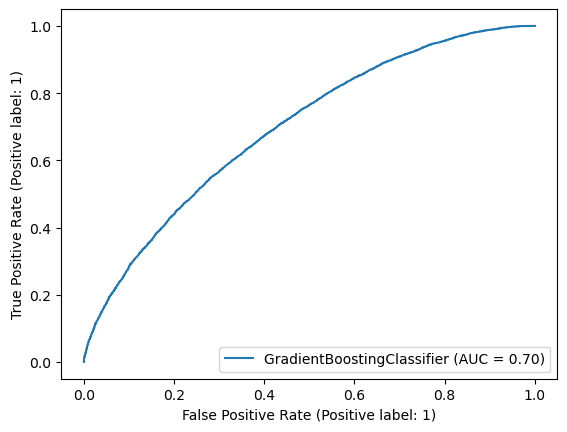

In [28]:
curve_disp = RocCurveDisplay.from_estimator(gbm_tuned, x_test, y_test)